# Median Yearly Salary vs. Job Count (2.15.1) - Problem

Problem Statement:
Create a scatter plot to compare the median yearly salary and the number of jobs based on the job_title_short column.
To create the scatter plot first create a new DataFrame using the groupby() method to aggregate and find the median salary and job count for each job title.
Annotate each point with the job title name.

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Pedro\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


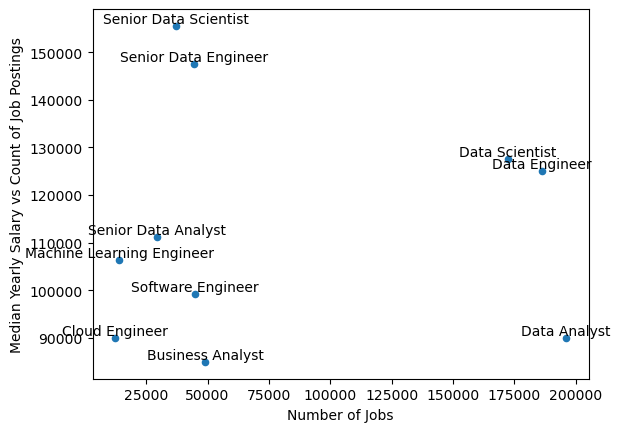

In [3]:
# Group Data by job title and calculate average yearly salary and job count

from numpy import mean


job_title_stats = df.groupby('job_title_short').agg(
    median_salary_year_avg = ('salary_year_avg', 'median'),
    job_count=('job_title_short', 'count')
).dropna()

# Plotting the results

job_title_stats.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary vs Count of Job Postings')

# Adding job title labels to each point

for i in range(len(job_title_stats)):
    job_count = job_title_stats['job_count'].iloc[i]
    mean_salary = job_title_stats['median_salary_year_avg'].iloc[i]
    job_title = job_title_stats.index[i]
    plt.text(job_count, mean_salary, job_title, ha='center', va='bottom')
plt.show()